Abalone Data

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split

In [2]:
data = arff.loadarff('abalone.arff')
df = pd.DataFrame(data[0])
print(df.shape)

df.head()

(4177, 11)


,Sex=M,Sex=F,Sex=I,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class_Rings
0,1.0,0.0,0.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,1.0,0.0,0.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.0,1.0,0.0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,1.0,0.0,0.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.0,0.0,1.0,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex=M,4177.0,0.365813,0.481715,0.0,0.000000,0.000000,1.000000,1.0
Sex=F,4177.0,0.312904,0.463731,0.0,0.000000,0.000000,1.000000,1.0
Sex=I,4177.0,0.321283,0.467025,0.0,0.000000,0.000000,1.000000,1.0
Length,4177.0,0.606746,0.162288,0.0,0.506757,0.635135,0.729730,1.0
Diameter,4177.0,0.593078,0.166790,0.0,0.495798,0.621849,0.714286,1.0
Height,4177.0,0.123466,0.037015,0.0,0.101770,0.123894,0.146018,1.0
Whole weight,4177.0,0.292808,0.173681,0.0,0.155658,0.282451,0.407650,1.0
Shucked weight,4177.0,0.241000,0.149269,0.0,0.124412,0.225286,0.336920,1.0
Viscera weight,4177.0,0.237121,0.144324,0.0,0.122449,0.224490,0.332456,1.0
Shell weight,4177.0,0.236503,0.138717,0.0,0.128052,0.231689,0.326358,1.0


In [4]:
print(df["Class_Rings"])

0       0.500000
1       0.214286
2       0.285714
3       0.321429
4       0.214286
          ...   
4172    0.357143
4173    0.321429
4174    0.285714
4175    0.321429
4176    0.392857
Name: Class_Rings, Length: 4177, dtype: float64


In [5]:
X = df.drop("Class_Rings",axis=1)
X.head()
features = (X.shape)[1] # feature value
print(features) 

10


In [6]:
Y = df['Class_Rings']
Y.head()

0    0.500000
1    0.214286
2    0.285714
3    0.321429
4    0.214286
Name: Class_Rings, dtype: float64

In [7]:
# Train - Test ayrımını yapmak lazım.
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size = 0.2)

In [8]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size = 0.2)   

In [9]:
# Model
# 1 Hidden katmanlı yapı

model = Sequential()
model.add(Dense(5, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer


In [10]:
# Adam optimizer ile MAE performans kriteri ile
model.compile(tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train, epochs=30, batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/30
42/42 [==============================] - 1s 9ms/step - loss: 0.3072 - accuracy: 0.0000e+00 - val_loss: 0.2229 - val_accuracy: 0.0015
Epoch 2/30
42/42 [==============================] - 0s 4ms/step - loss: 0.1595 - accuracy: 0.0000e+00 - val_loss: 0.1246 - val_accuracy: 0.0015
Epoch 3/30
42/42 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0015
Epoch 4/30
42/42 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0015
Epoch 5/30
42/42 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 0.0015
Epoch 6/30
42/42 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0015
Epoch 7/30
42/42 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_accuracy:

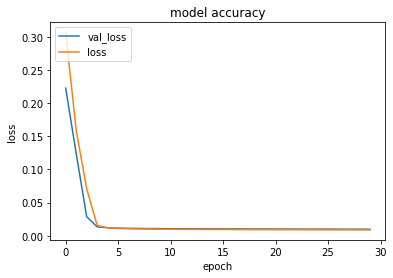

In [19]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

In [23]:
testLoss = model.evaluate(X_test,y_test,verbose=0) 

In [27]:
print("Test loss : ",testLoss[0])
print("Test accuracy : ",testLoss[1])

Test loss :  0.008199487812817097
Test accuracy :  0.0


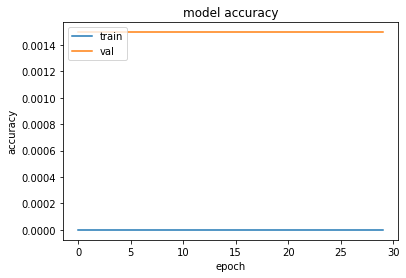

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
from scikeras.wrappers import KerasRegressor

In [31]:
keras_clf = KerasRegressor(model = model, optimizer="adam", epochs=50,batch_size=64,loss='mean_squared_error',verbose=0)

In [32]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [33]:
bag_reg = BaggingRegressor(base_estimator=keras_clf,n_estimators=10,random_state=1)

In [36]:
baghist = bag_reg.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpw1x63sk8\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpt7x8063m\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp8qpp9j5w\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp922uu86i\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp7q988mnl\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpn8ave5sh\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpoep1bal_\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpcwdo51zb\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpdfmh0zw9\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpdalxnebd\assets


In [41]:
baghist.score(X_test,y_test)

0.43868603895262626

In [42]:
ada_reg = AdaBoostRegressor(base_estimator=keras_clf,n_estimators=10,random_state=1)

In [43]:
adahis = ada_reg.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmphez9fnf3\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmptrap0t5b\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpyf_qm_is\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpxmhcet2r\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpzb16hac3\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp9bf4hwyn\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmplc4z60p3\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpe8hq5cvp\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpi26rlh92\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpnp96xj7d\assets


In [44]:
adahis.score(X_test,y_test)

0.4783871693124806

In [45]:
ranSub_reg = BaggingRegressor(base_estimator=keras_clf,n_estimators=10,bootstrap=False,bootstrap_features=True,random_state=1)

In [46]:
ransubhist = ranSub_reg.fit(X_train,y_train)

INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpq7514n7g\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpeweyrdl5\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpat6jra48\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpms3rx7ps\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp_coe0t6g\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmptcv56a8w\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpuduvss2d\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmpgt5h52yc\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp91r3gcjo\assets
INFO:tensorflow:Assets written to: C:\Users\enes_\AppData\Local\Temp\tmp957ny895\assets


In [47]:
ransubhist.score(X_test,y_test)

0.4502186251891681